In [1]:
import numpy as np
import pickle
import pandas as pd

In [2]:
with open('scraped_cars_data.pickle','rb') as f:
    scraped_cars_data = pickle.load(f)

In [3]:
with open('scraped_static_data.pickle','rb') as f:
    scraped_static_data = pickle.load(f)

In [4]:
models = list(scraped_cars_data.keys())

In [5]:
dataset = pd.read_csv('./150106-D-private Cars lic 1995 to 2013 Model gender-MD.csv')
dataset

,Year,Make/Model,Male,Female,Unknown,Total,Male.1,Female.1,Unknown.1
0,2013,ABARTH 500,2305,1697,180,4182,55%,41%,4%
1,2012,ABARTH 500,2081,1373,155,3609,58%,38%,4%
2,2011,ABARTH 500,1637,1000,142,2779,59%,36%,5%
3,2010,ABARTH 500,1101,649,93,1843,60%,35%,5%
4,2009,ABARTH 500,606,280,38,924,66%,30%,4%
...,...,...,...,...,...,...,...,...,...
34629,2011,ZHENHUA Model Missing,2,0,0,2,100%,0%,0%
34630,2010,ZHENHUA Model Missing,1,0,0,1,100%,0%,0%
34631,2012,ZINGYUE Model Missing,1,0,0,1,100%,0%,0%
34632,2011,ZINGYUE Model Missing,1,0,0,1,100%,0%,0%


In [6]:
# Convert percentage to float
dataset['Male.1'] = [float(x.replace('%', '')) for x in dataset['Male.1'].values]
dataset['Female.1'] = [float(x.replace('%', '')) for x in dataset['Female.1'].values]
dataset['Unknown.1'] = [float(x.replace('%', '')) for x in dataset['Unknown.1'].values]
dataset

,Year,Make/Model,Male,Female,Unknown,Total,Male.1,Female.1,Unknown.1
0,2013,ABARTH 500,2305,1697,180,4182,55.0,41.0,4.0
1,2012,ABARTH 500,2081,1373,155,3609,58.0,38.0,4.0
2,2011,ABARTH 500,1637,1000,142,2779,59.0,36.0,5.0
3,2010,ABARTH 500,1101,649,93,1843,60.0,35.0,5.0
4,2009,ABARTH 500,606,280,38,924,66.0,30.0,4.0
...,...,...,...,...,...,...,...,...,...
34629,2011,ZHENHUA Model Missing,2,0,0,2,100.0,0.0,0.0
34630,2010,ZHENHUA Model Missing,1,0,0,1,100.0,0.0,0.0
34631,2012,ZINGYUE Model Missing,1,0,0,1,100.0,0.0,0.0
34632,2011,ZINGYUE Model Missing,1,0,0,1,100.0,0.0,0.0


In [7]:
THRESHOLD = 50
male_models = []
female_models = []
neutral_models = []

for model in models:
    mask = (dataset['Make/Model'] == model)
    male_mean_ratio = dataset[mask]['Male.1'].mean()
    female_mean_ratio = dataset[mask]['Female.1'].mean()
    
    if (male_mean_ratio > THRESHOLD):
        male_models.append((male_mean_ratio, model))
    elif (female_mean_ratio > THRESHOLD):
        female_models.append((female_mean_ratio, model))
    else:
        neutral_models.append(model)

In [8]:
assert((len(male_models) + len(female_models) + len(neutral_models)) == len(models))
len(male_models), len(female_models), len(neutral_models)

(448, 51, 34)

In [9]:
top_k_male_models = sorted(male_models, key=lambda x: x[0], reverse=True)[:3]
top_k_female_models = sorted(female_models, key=lambda x: x[0], reverse=True)[:3]

In [10]:
from PIL import Image
import os
IMAGE_DIR = 'images'
import ipyplot

def display_image(model):
    print('########################################################')
    print(f'Images for {model}')
    count = 3
    images = []
    for models in scraped_cars_data[model]:
        for image in models['images']:
            filename = os.path.join(IMAGE_DIR, image + '.jpg')
            img = np.asarray(Image.open(filename).convert('RGB'))
            images.append(img)
            count -= 1
            if not count:
                ipyplot.plot_images(images, range(len(images)), img_width=300)
                return images
    return images

Cars bought mostly by Males
########################################################
Images for LOTUS ESPRIT



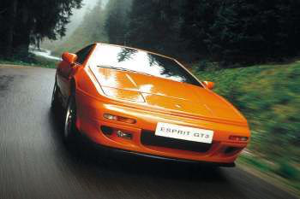
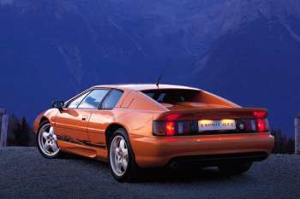
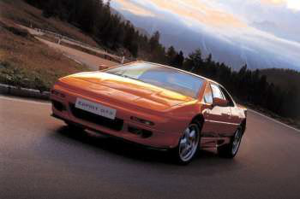


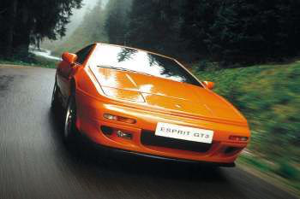
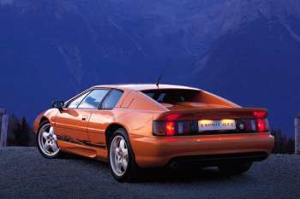
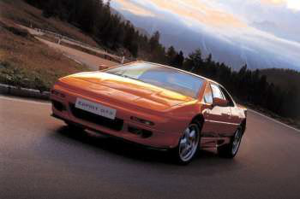

########################################################
Images for FERRARI F430



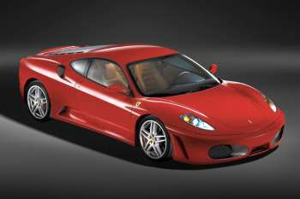
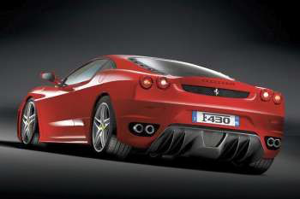
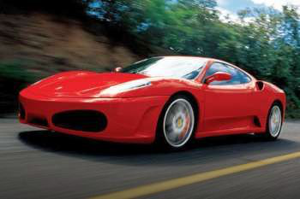


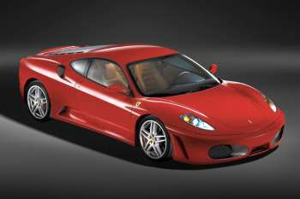
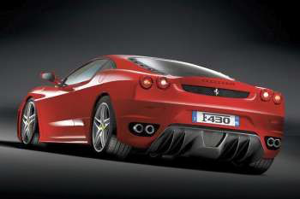
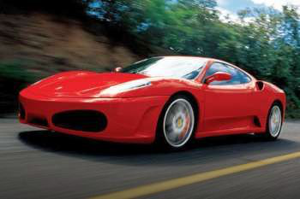

########################################################
Images for ASTON MARTIN VANTAGE



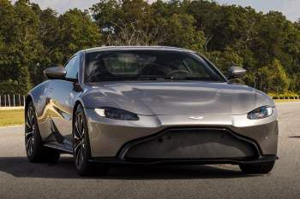
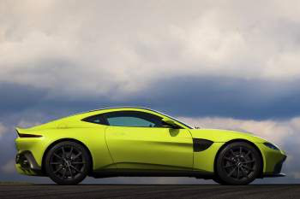
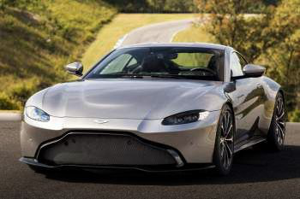


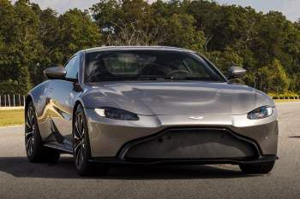
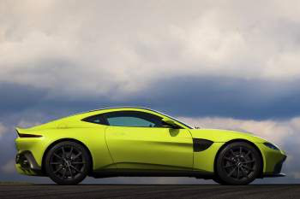
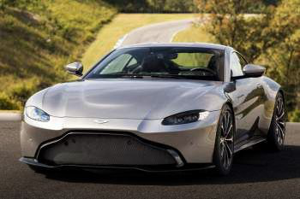

In [11]:
images = []
print('Cars bought mostly by Males')
for (_, model) in top_k_male_models:
    display_image(model)

Cars bought mostly by Females
########################################################
Images for FORD STREETKA



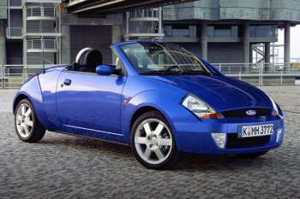
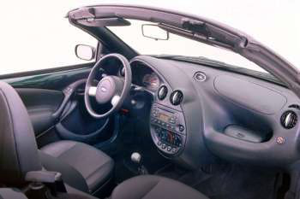
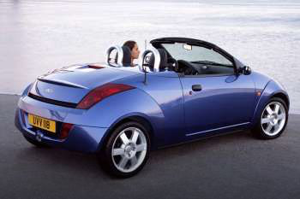


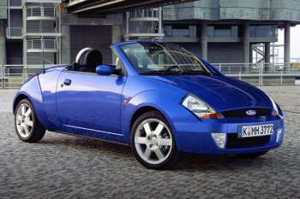
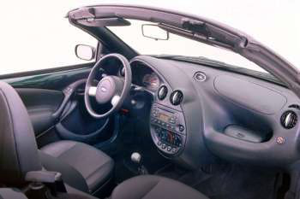
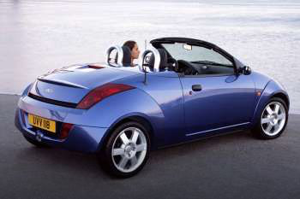

########################################################
Images for FORD KA



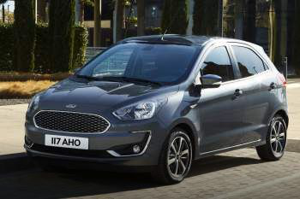
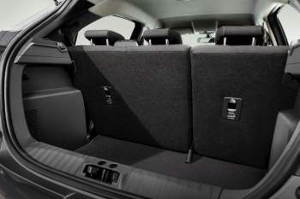
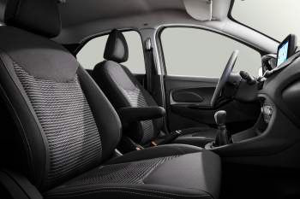


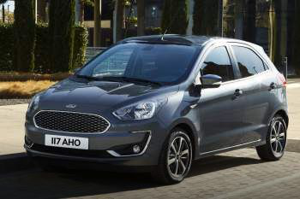
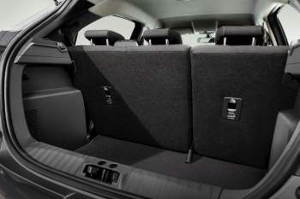
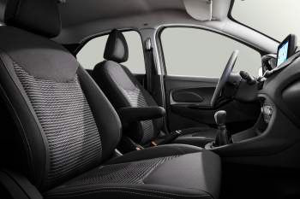

########################################################
Images for PEUGEOT 107



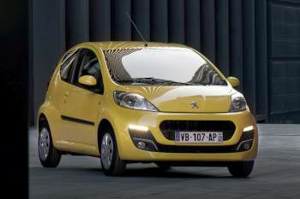
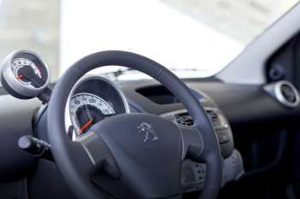
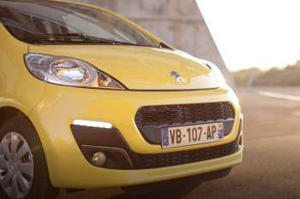


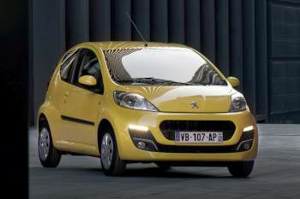
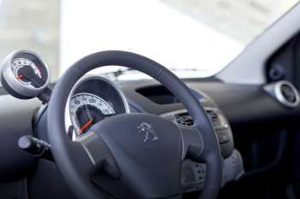
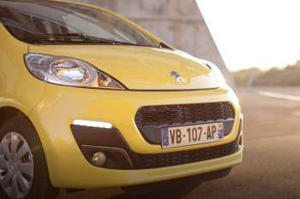

In [12]:
print('Cars bought mostly by Females')
for (_, model) in top_k_female_models:
    display_image(model)